In [24]:
from google.colab import files
uploaded = files.upload()

Saving newdata.csv to newdata (1).csv


#IMPORT LIBRARIES

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [55]:
dataset= pd.read_csv('newdata (1).csv')
dataset.head()

,State_Name,Crop_Year,Area,Production
0,Uttar Pradesh,1997,10853,6000
1,Uttar Pradesh,1997,214,5000
2,Uttar Pradesh,1997,73,6000
3,Uttar Pradesh,1997,14,5000
4,Uttar Pradesh,1997,8799,4586


#HANDLING CATEGORICAL DATA

In [56]:
x = dataset[['Crop_Year','Area']]
#separate the other attributes from the predicting attribute

In [57]:
y = dataset[['Production']]
#separte the predicting attribute into Y for model training 

In [58]:
import pandas as pd 
from sklearn.preprocessing import LabelEncoder

x = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values 
labelencoder_X = LabelEncoder()

x[:,0] = labelencoder_X.fit_transform(x[:,0])
x[:,1] = labelencoder_X.fit_transform(x[:,1])
print(x)
#Here we are using LabelEncoder

#The following statement is used to drop any rows in a dataset which contains nan values
dataset = dataset.dropna(how='all',axis=0)

[[0 0 10853]
 [0 0 214]
 [0 0 73]
 [0 0 14]
 [0 0 8799]
 [0 0 10]
 [0 0 1076]
 [0 0 768]
 [0 0 202707]
 [0 0 175]
 [0 0 330]
 [0 0 453435]
 [0 0 223]
 [0 0 4826]
 [0 0 6927]
 [0 0 9]
 [0 0 127]
 [0 0 9450]
 [0 0 789]
 [0 0 30]
 [0 0 208030]
 [0 0 163]
 [0 0 217]
 [0 0 545]
 [0 0 5599]
 [0 0 27664]
 [0 1 9664]
 [0 1 208]
 [0 1 48]
 [0 1 10]
 [0 1 8047]
 [0 1 15]
 [0 1 18]
 [0 1 199011]
 [0 1 149]
 [0 1 211]
 [0 1 1]
 [0 1 188]
 [0 1 4910]
 [0 1 6656]
 [0 1 11]
 [0 1 207]
 [0 1 10196]
 [0 1 1274]
 [0 1 6]
 [0 1 212687]
 [0 1 137]
 [0 1 164]
 [0 1 362]
 [0 1 559]
 [0 1 5675]
 [0 1 246]
 [0 1 24802]
 [0 1 48]
 [0 1 28]
 [0 2 9616]
 [0 2 192]
 [0 2 74]
 [0 2 14]
 [0 2 8511]
 [0 2 8]
 [0 2 203833]
 [0 2 161]
 [0 2 4]
 [0 2 148]
 [0 2 4267]
 [0 2 5967]
 [0 2 3]
 [0 2 134]
 [0 2 20]
 [0 2 1017]
 [0 2 216884]
 [0 2 156]
 [0 2 2]
 [0 2 324]
 [0 2 730]
 [0 2 9700]
 [0 2 5745]
 [0 2 23194]
 [0 2 49]
 [0 2 7]
 [0 3 9191]
 [0 3 133]
 [0 3 81]
 [0 3 12]
 [0 3 7209]
 [0 3 3]
 [0 3 211031]
 [0 3 45]]


#GRAPHS

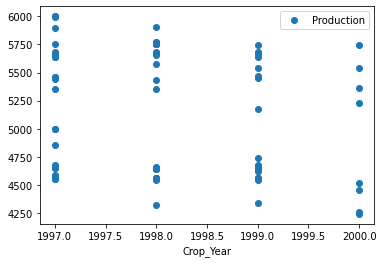

In [59]:
dataset.plot(x = 'Crop_Year', y = 'Production', style='o')
plt.show()

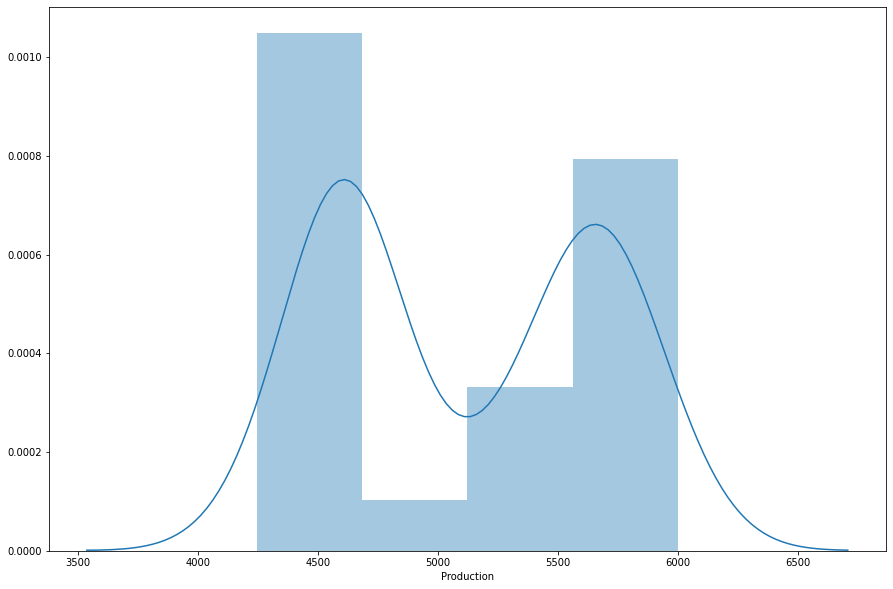

In [60]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seaborn.distplot(dataset['Production'])
plt.show()

#SPLITTING OF DATASET INTO TRAIN AND TEST SET

In [61]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state=0)

#NORMALIZING DATA

In [62]:
y_train = y_train[~np.isnan(y_train)]
#the statement above is used to drop any row in an array containing nan values

In [63]:
# data normalization with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(x_train)

# transform training data
X_train_norm = norm.transform(x_train)

# transform testing data
X_test_norm = norm.transform(x_test)

#The statements below are used to check for any nan values in our dataset
#pd.isnull(x_train).sum() > 0
pd.isnull(y_train).sum() > 0
#pd.isnull(dataset).sum() > 0

False

#ALGORITHM

In [64]:
model =LinearRegression()
#loading the model constructor

#FITTING OF TRAINING DATA

In [65]:
x_train = x_train[0:418]
#Here we have used slicing so that arrays are of same size and fitting can be done accordingly
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [66]:
print('Intercept is :',model.intercept_)

Intercept is : 5252.265784063899


In [67]:
print('Coefficient is :' ,model.coef_)

Coefficient is : [ 0.00000000e+00 -1.25283345e+02 -1.64482575e-04]


#PREDICTIONS FOR OUR PROBLEM STATEMENT WITH THE RELATED GRAPHS

In [68]:
predictions = model.predict(x_test)

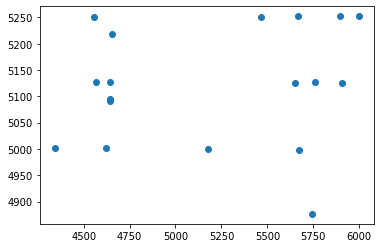

In [69]:
plt.scatter(y_test,predictions)


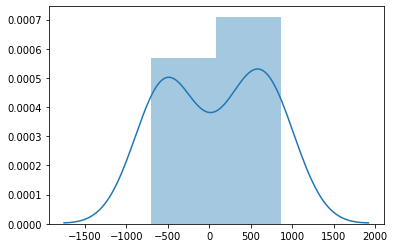

In [70]:
import seaborn as sns
sns.distplot((y_test-predictions))

#EVALUATION

In [71]:
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)    # initialise a matrix full with zeros
y_pred_classes[predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_test_classes = np.zeros_like(predictions)
y_test_classes[y_test > cutoff] = 1
print(metrics.accuracy_score(y_test_classes, y_pred_classes))

1.0


#SAVING THE MODEL USING PICKLE LIBRARY

In [72]:
import pickle 

# Save the trained model as a pickle string. 
saved_model = pickle.dumps(model) 

# Load the pickled model 
model_from_pickle = pickle.loads(saved_model) 

# Use the loaded pickled model to make predictions 
model_from_pickle.predict(x_test) 


array([5252.25377684, 5251.47199116, 5126.97454411, 5126.94839138,
       5000.71762696, 5125.65884799, 5091.99913382, 5126.77288847,
       4997.88408564, 4876.40834798, 5252.13946145, 5125.39287967,
       5094.24859752, 5001.69843655, 5218.92401471, 5252.24489478,
       5251.34484613, 5001.66751383])

#ACCURACY w.r.t TRAINED DATA

Confusion Matrix

In [75]:
from sklearn.metrics import confusion_matrix

y_train = y_train[0:18]

cutoff = 0.7                                   # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)    # initialise a matrix full with zeros
y_pred_classes[predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_train_classes = np.zeros_like(predictions)
y_train_classes[y_train > cutoff] = 1

results =confusion_matrix(y_train_classes, y_pred_classes)
print(results)

[[18]]


Precision, Recall, Support, Fscore

In [76]:
import numpy
from sklearn.metrics import precision_recall_fscore_support

cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)    # initialise a matrix full with zeros
y_pred_classes[predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_train_classes = np.zeros_like(predictions)
y_train_classes[y_train > cutoff] = 1

precision_recall_fscore_support(y_train_classes, y_pred_classes, average='macro')

(1.0, 1.0, 1.0, None)

#ACCURACY w.r.t TEST DATA

Confusion Matrix

In [77]:
cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)    # initialise a matrix full with zeros
y_pred_classes[predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_test_classes = np.zeros_like(predictions)
y_test_classes[y_test > cutoff] = 1

results =confusion_matrix(y_test_classes, y_pred_classes)
print(results)

[[18]]


Precision, Recall, Support, Fscore

In [78]:
import numpy
from sklearn.metrics import precision_recall_fscore_support

cutoff = 0.7                              # decide on a cutoff limit
y_pred_classes = np.zeros_like(predictions)    # initialise a matrix full with zeros
y_pred_classes[predictions > cutoff] = 1       # add a 1 if the cutoff was breached

y_test_classes = np.zeros_like(predictions)
y_test_classes[y_test > cutoff] = 1

precision_recall_fscore_support(y_test_classes, y_pred_classes, average='macro')

(1.0, 1.0, 1.0, None)